**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "matrix.umap.cluster.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_merge = dat
print(dim(dat))
head(dat, 3)

[1] 87610   540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,-21.87767,-9.176196,39,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,-12.15321,-12.879920,20,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,-11.02704,-3.031374,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


## Focus on CTCF clusters (`Cluster == 2, Cluster == 8`)

In [3]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster %in% c(2, 8)) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat))
head(dat)

[1] 11251   540


Region,UMAP1,UMAP2,Cluster,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:267910-268557,-29.42658,12.034660,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:912735-913419,-21.14227,1.423582,8,1,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:975975-976656,-28.35145,11.595084,2,0,1,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1032702-1033526,-11.24629,1.758257,2,1,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1249886-1251201,-29.19260,11.777773,2,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:1788936-1789413,-30.04535,10.630426,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


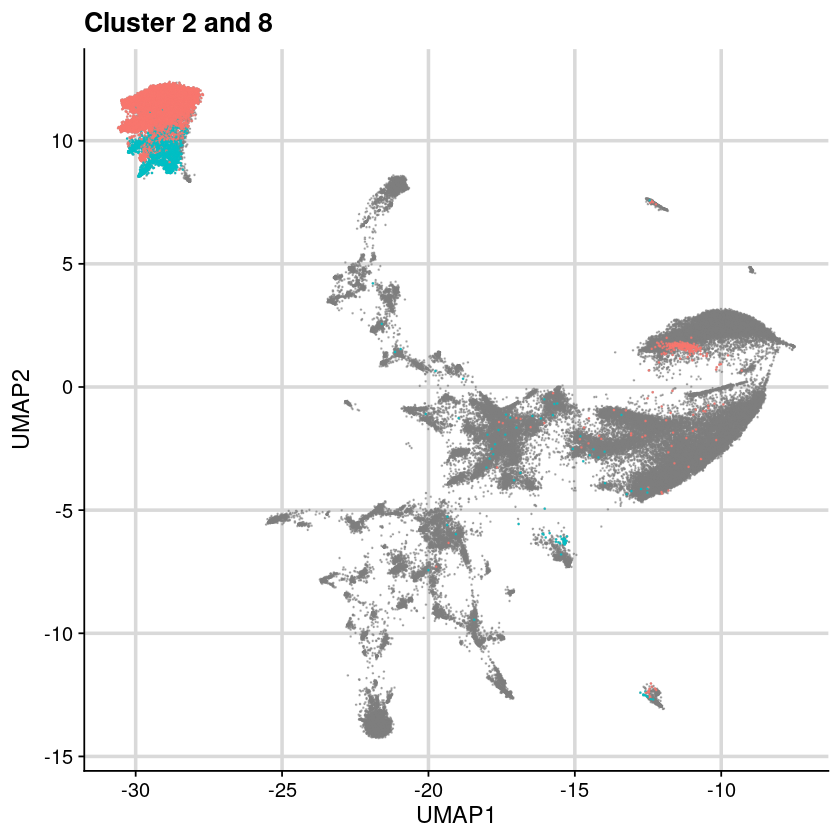

In [8]:
dat1 = dat_region_merge
dat2 = dat_region_merge_sub
gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey50", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.7) +
    #scale_color_brewer(palette = "Set2") +
    labs(title = "Cluster 2 and 8") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")

options(repr.plot.height = 7, repr.plot.width = 7)
print(gpt)

## Enrichment test on `CTCF` without background corrections

In [65]:
num_cluster = 2
txt_feature = "CTCF"

dat = dat_region_merge
dat = dat %>% dplyr::mutate(Label_Cluster = as.integer(Cluster == num_cluster))
dat[,"Label_Feature"] = dat[,txt_feature]

dat = dat %>% dplyr::select(Cluster, Label_Cluster, CTCF, Label_Feature)
head(dat, 20)

Cluster,Label_Cluster,CTCF,Label_Feature
<dbl>,<int>,<dbl>,<dbl>
39,0,0,0
20,0,1,1
0,0,0,0
24,0,0,0
21,0,0,0
5,0,0,0
5,0,0,0
2,1,1,1
3,0,0,0


In [66]:
mat = table(dat$Label_Cluster, dat$Label_Feature)
mat

   
        0     1
  0 61606 16902
  1    10  9092

In [67]:
fisher.test(mat)


	Fisher's Exact Test for Count Data

data:  mat
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1784.527 8192.000
sample estimates:
odds ratio 
  3288.402 


In [68]:
num_cluster = 8
txt_feature = "CTCF"

dat = dat_region_merge
dat = dat %>% dplyr::mutate(Label_Cluster = as.integer(Cluster == num_cluster))
dat[,"Label_Feature"] = dat[,txt_feature]

dat = dat %>% dplyr::select(Cluster, Label_Cluster, CTCF, Label_Feature)
head(dat, 20)

Cluster,Label_Cluster,CTCF,Label_Feature
<dbl>,<int>,<dbl>,<dbl>
39,0,0,0
20,0,1,1
0,0,0,0
24,0,0,0
21,0,0,0
5,0,0,0
5,0,0,0
2,0,1,1
3,0,0,0


In [70]:
dat %>% dplyr::filter(Cluster == 8) %>% head

Cluster,Label_Cluster,CTCF,Label_Feature
<dbl>,<int>,<dbl>,<dbl>
8,1,1,1
8,1,1,1
8,1,1,1
8,1,1,1
8,1,1,1
8,1,1,1


In [69]:
mat = table(dat$Label_Cluster, dat$Label_Feature)
mat

   
        0     1
  0 61616 23845
  1     0  2149

## Enrichment test on `CTCF`, `SMC3`, `RAD21` without background corrections

In [48]:
vec_num_cluster = c(2, 8)
vec_txt_feature = c("CTCF", "SMC3", "RAD21")

lst_outer = list()
for (num_cluster in vec_num_cluster){
    
    lst_inner = list()
    for (txt_feature in vec_txt_feature){
        dat = dat_region_merge
        dat = dat %>% dplyr::mutate(Label_Cluster = as.integer(Cluster == num_cluster))
        dat[,"Label_Feature"] = dat[,txt_feature]

        dat = dat %>% dplyr::select(Label_Cluster, Label_Feature) 
        mat = table(dat$Label_Cluster, dat$Label_Feature)
        fit = fisher.test(mat)
        
        lst_inner[[txt_feature]] = fit
    }
    lst_outer[[as.character(num_cluster)]] = lst_inner
}

lst_fit_fisher = lst_outer

In [49]:
fit


	Fisher's Exact Test for Count Data

data:  mat
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 266.8404 913.3651
sample estimates:
odds ratio 
   469.902 


In [50]:
res$p.value

[1] 0

In [51]:
res$estimate

odds ratio 
   469.902

In [77]:
lst_outer = lst_res_fisher
lst_inner = lst_outer[[1]]

lst = lapply(lst_inner, function(fit){
    res = c(fit$estimate, fit$p.value)
    names(res) = c("OddsRatio", "Pvalue")
    return(res)
})
dat = bind_rows(lst, .id = "Feature")
dat

Feature,OddsRatio,Pvalue
<chr>,<dbl>,<dbl>
CTCF,3288.4024,0
SMC3,170.0029,0
RAD21,3704.7511,0


In [78]:
lst_outer = lst_res_fisher

lst = lapply(lst_outer, function(lst_inner){
    lst = lapply(lst_inner, function(fit){
        res = c(fit$estimate, fit$p.value)
        names(res) = c("OddsRatio", "Pvalue")
    return(res)
    })
    
    dat = bind_rows(lst, .id = "Feature")
    return(dat)
})
dat = bind_rows(lst, .id = "Cluster")
dat

Cluster,Feature,OddsRatio,Pvalue
<chr>,<chr>,<dbl>,<dbl>
2,CTCF,3288.402368,0.000000e+00
2,SMC3,170.002904,0.000000e+00
2,RAD21,3704.751129,0.000000e+00
8,CTCF,Inf,0.000000e+00
8,SMC3,2.547513,1.558037e-76
8,RAD21,469.902026,0.000000e+00
